In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


# PreProcess
- Identify null values in the dataset

In [4]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

- Substitute Average age for null age filds.

In [5]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
mean_age

63.1136023916293

- Delete B and $ caracters from NetWorth column.

In [9]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


# Process

In [12]:
df = data.sort_values(by=['NetWorth'], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


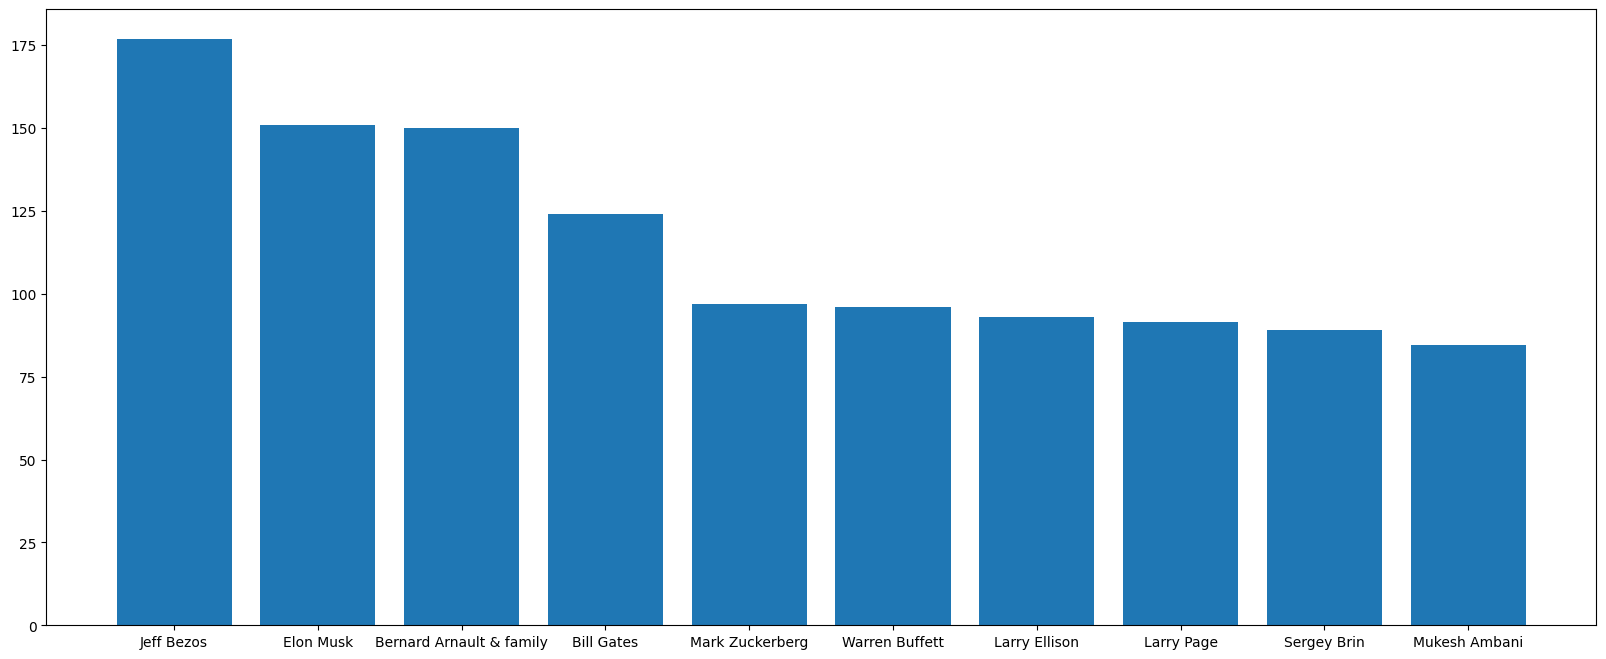

In [20]:
plt.figure(figsize=(20, 8))
plt.bar(df['Name'], df['NetWorth'])
plt.show()

In [21]:
df = data['Source'].value_counts().head(10).reset_index()
df

,index,Source
0,real estate,171
1,pharmaceuticals,99
2,investments,90
3,diversified,85
4,software,62
5,retail,47
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


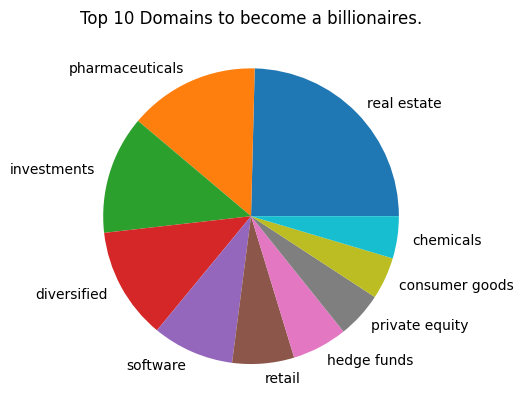

In [27]:
plt.pie(df['Source'], labels=df['index'])
plt.title('Top 10 Domains to become a billionaires.')
plt.show()

In [29]:
df = data['Industry'].value_counts().reset_index()
df

,index,Industry
0,Finance & Investments,371
1,Technology,365
2,Manufacturing,331
3,Fashion & Retail,273
4,Healthcare,221
5,Food & Beverage,219
6,Real Estate,215
7,Diversified,188
8,Energy,100
9,Media & Entertainment,95


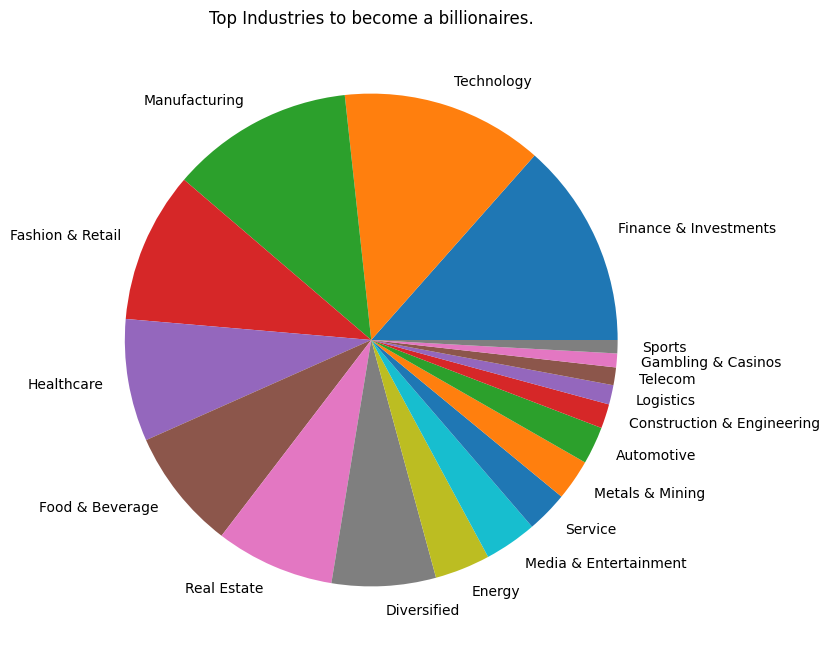

In [32]:
plt.figure(figsize=(24, 8))
plt.pie(df['Industry'], labels=df['index'])
plt.title('Top Industries to become a billionaires.')
plt.show()

In [34]:
df = data['Country'].value_counts().head().reset_index()
df

,index,Country
0,United States,724
1,China,626
2,India,140
3,Germany,136
4,Russia,118


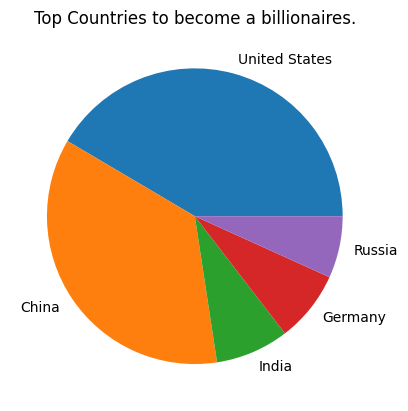

In [37]:
plt.pie(df['Country'], labels=df['index'])
plt.title('Top Countries to become a billionaires.')
plt.show()